In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
df = pd.read_csv('../../output/seahorse_eval.csv')
df2 = pd.read_csv('../../output/seahorse_ds_2.csv')

In [14]:
df = df[~df['metadata/Decoding config'].isna()]

# df = df[~df['metadata/Decoding config'].str.contains('short')]
display(df)
print(df.columns)


# tasks names
tasks_names = [c.split('/')[1] for c in df.columns if "SH" in c.split('/')[0]]
print(tasks_names)

,Unnamed: 0,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),H(text),H(text|summary),SH/Attribution,SH/Comprehensible,SH/Conciseness,SH/Grammar,SH/Main ideas,SH/Repetition
0,t5_base-_-seahorse_english-_-seahorse-_-2023-1...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_base,seahorse_english,114.194194,89.397266,-24.796928,62.264696,34.275518,-27.989178,0.669127,1.000000,0.493850,0.958795,0.645141,0.939729
1,mt5_small-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-02,mt5_small,seahorse_english,120.829316,95.975523,-24.853792,62.919655,34.769621,-28.150034,0.505929,1.000000,0.264163,0.903162,0.444005,0.783267
2,mt5_xxl-_-seahorse_english-_-seahorse-_-2023-1...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,mt5_xxl,seahorse_english,103.173686,78.038384,-25.135303,62.420124,34.597309,-27.822815,0.624242,1.000000,0.513939,0.936364,0.690909,0.972727
3,t5_xxl-_-seahorse_english-_-seahorse-_-2023-11...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_xxl,seahorse_english,106.048654,81.445918,-24.602736,62.063647,34.395480,-27.668167,0.688835,1.000000,0.538743,0.959121,0.691275,0.978035
4,reference-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,reference,seahorse_english,97.491387,72.594885,-24.896501,62.587694,34.789429,-27.798265,0.588128,1.000000,0.474864,0.949727,0.673531,0.994549
5,mt5_small_250steps-_-seahorse_english-_-seahor...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,mt5_small_250steps,seahorse_english,137.501810,113.288709,-24.213101,62.934159,35.190226,-27.743933,0.439351,0.998590,0.098731,0.881523,0.192525,0.468265
6,t5_base_250steps-_-seahorse_english-_-seahorse...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_base_250steps,seahorse_english,129.050269,104.696521,-24.353748,62.402327,34.704393,-27.697934,0.457283,0.999385,0.261832,0.939766,0.433927,0.772588
7,finetuned-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,finetuned,seahorse_english,105.384598,81.171415,-24.213183,62.143608,34.631701,-27.511908,0.609552,1.000000,0.490746,0.977910,0.608955,0.993433
8,1shot-_-seahorse_english-_-seahorse-_-2023-11-...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,1shot,seahorse_english,103.232264,78.254468,-24.977796,62.466964,34.528043,-27.938921,0.794136,1.000000,0.554673,0.966402,0.651802,0.986561


Index(['Unnamed: 0', 'metadata/Embedding model', 'metadata/Decoding config',
       'metadata/Date', 'metadata/Model name', 'metadata/Dataset name',
       'I(text -> summary)', 'H(summary)', 'H(summary|text)',
       'I(summary -> text)', 'H(text)', 'H(text|summary)', 'SH/Attribution',
       'SH/Comprehensible', 'SH/Conciseness', 'SH/Grammar', 'SH/Main ideas',
       'SH/Repetition'],
      dtype='object')
['Attribution', 'Comprehensible', 'Conciseness', 'Grammar', 'Main ideas', 'Repetition']


/tmp/ipykernel_12283/1942616802.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
/tmp/ipykernel_12283/1942616802.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


[Text(0, 0, 'mt5_small_250steps'),
 Text(1, 0, 'reference'),
 Text(2, 0, 'mt5_small'),
 Text(3, 0, 't5_base_250steps'),
 Text(4, 0, 'finetuned'),
 Text(5, 0, 'mt5_xxl'),
 Text(6, 0, '1shot'),
 Text(7, 0, 't5_xxl'),
 Text(8, 0, 't5_base')]

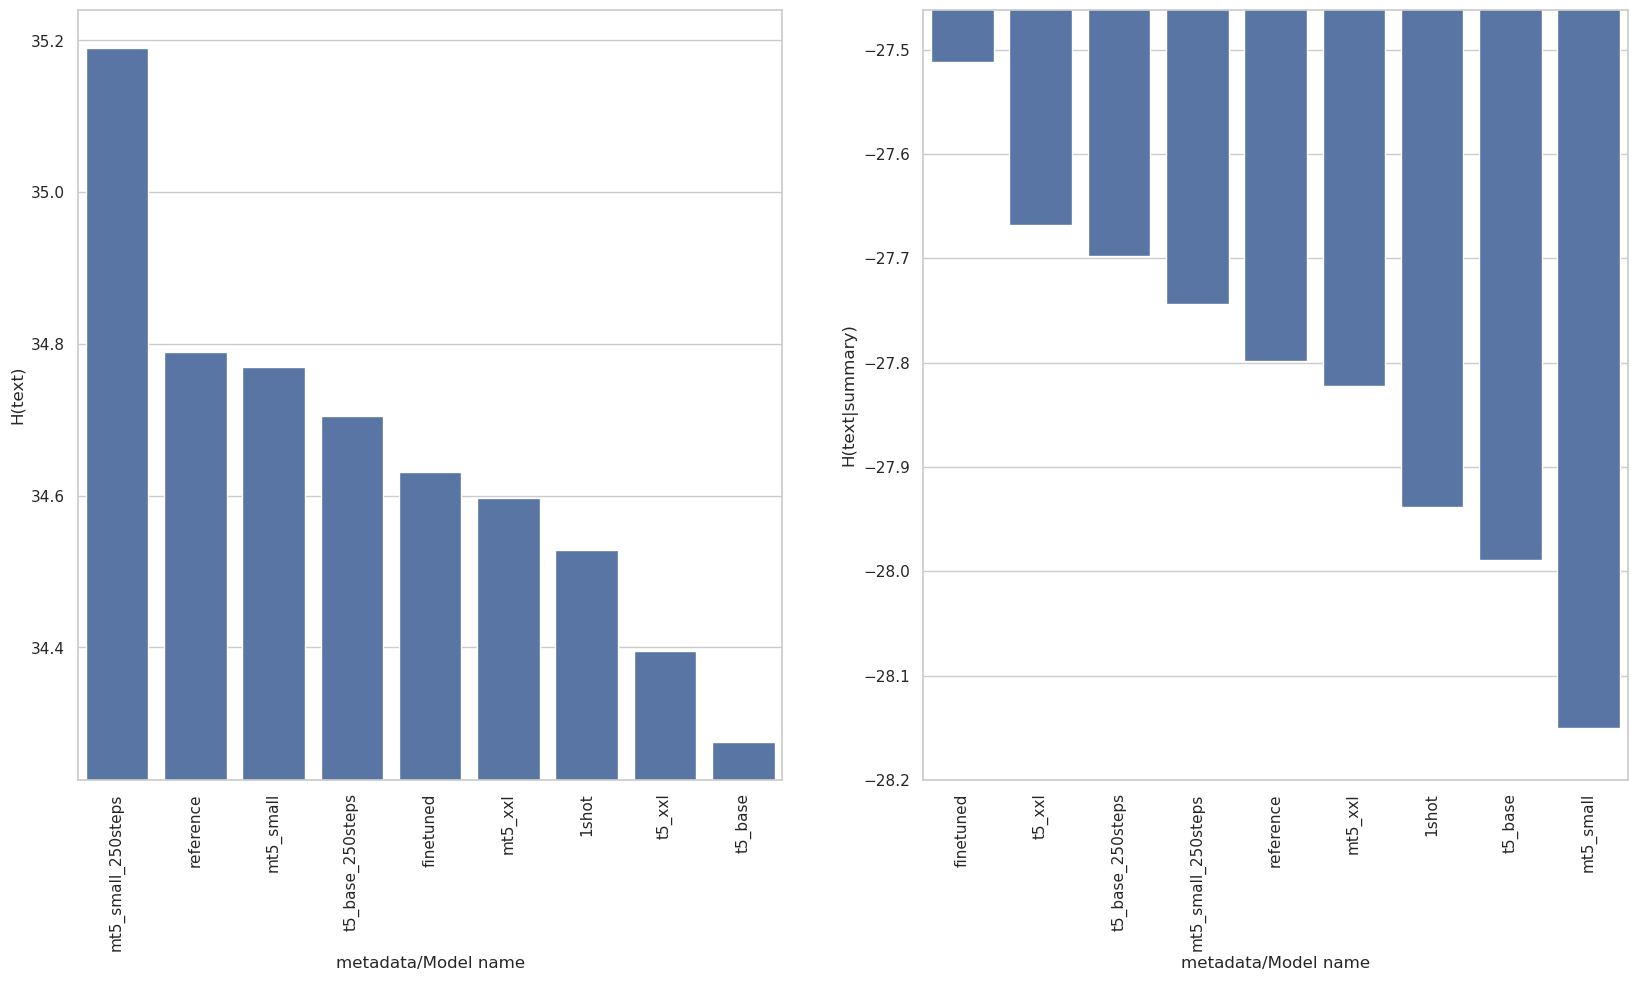

In [15]:

COL = "H(text|summary)"
COL2 = "H(text)"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False, sharex=False)
# order by I(summary -> text)

# same for df
df = df.sort_values(by=COL, ascending=False)
sns.barplot(data=df, x="metadata/Model name", y=COL, ax=ax2)

# set ylim based on the max and min
ax2.set_ylim([df[COL].min() - 0.05, df[COL].max() + 0.05])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


df = df.sort_values(by=COL2, ascending=False)
sns.barplot(data=df, x="metadata/Model name", y=COL2, ax=ax1)

# set ylim based on the max and min
ax1.set_ylim([df[COL2].min() - 0.05, df[COL2].max() + 0.05])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


/tmp/ipykernel_12283/1314919421.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_12283/1314919421.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


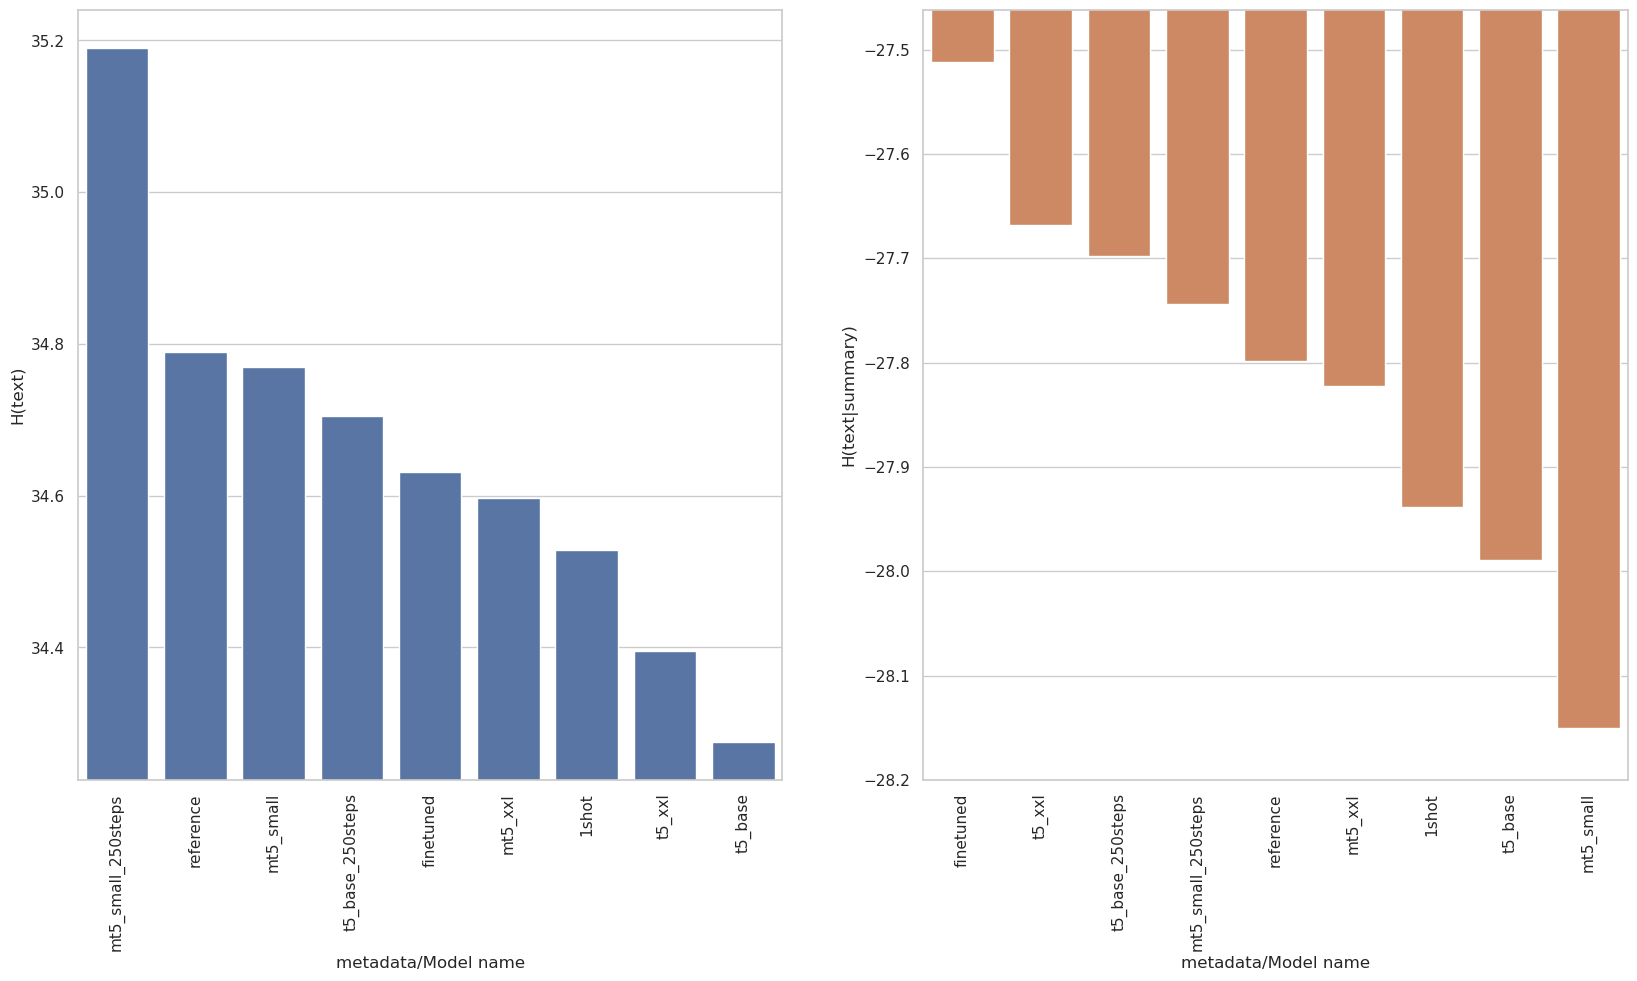

In [16]:

# order by I(summary -> text)
COL = "H(text|summary)"

df2 = df2.sort_values(by=COL, ascending=False)
sns.barplot(data=df2, x="metadata/Model name", y=COL, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


# same for df
df = df.sort_values(by=COL, ascending=False)
sns.barplot(data=df, x="metadata/Model name", y=COL, ax=ax2)
# lim 55 65
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

fig


In [17]:


df['source'] = df["Unnamed: 0"]





Attribution
Comprehensible
Conciseness
Grammar
Main ideas
Repetition


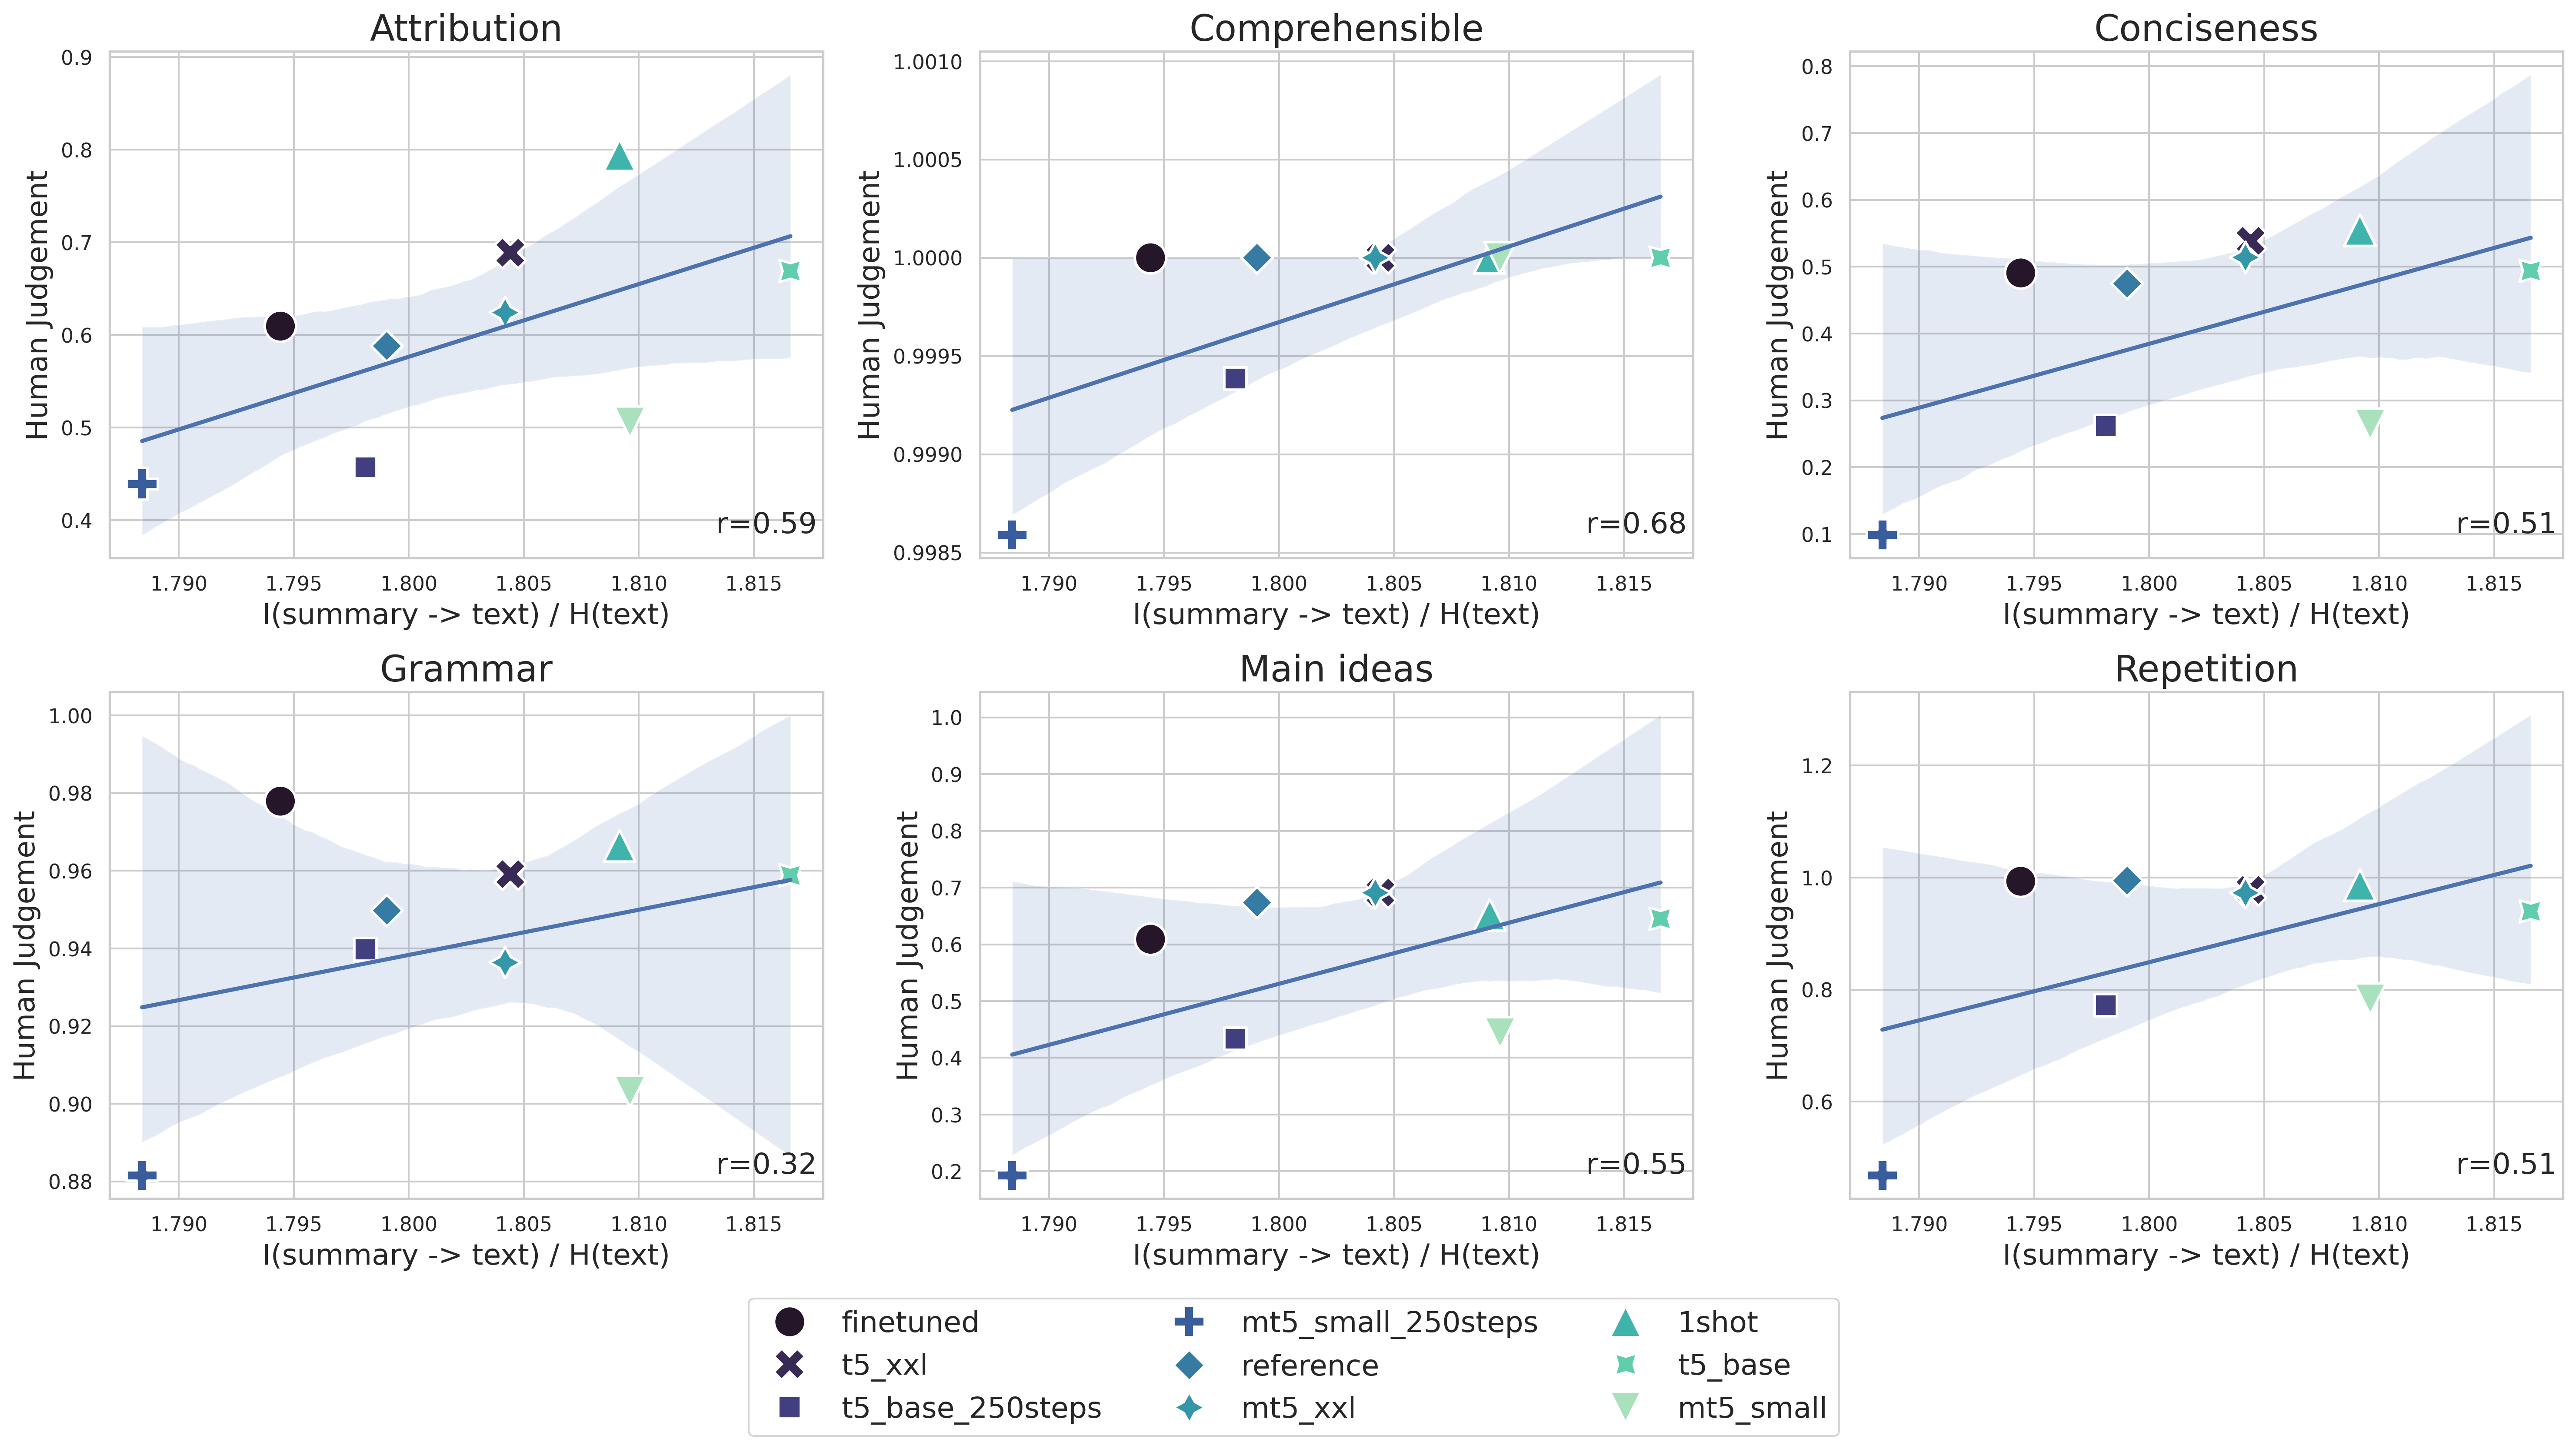

In [18]:

def custom_reg_plot(data, x=None, y=None, hue=None, **kwargs):
    ax = plt.gca()
    sns.regplot(data=data, x=x, y=y, ci=95, scatter=False, ax=ax, x_ci='sd')
    sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=100, ax=ax, **kwargs, palette='mako')
    return ax
    
    


fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=False, sharex=False, dpi=300)
# COL = "H(summary|text)"

axes = axes.flatten()
df['N-MI_1'] = df['I(text -> summary)'] / df['H(summary)']
df['I(summary -> text) / H(text)'] = df['I(summary -> text)'] / df['H(text)']
# info diff:
df["I(text -> summary) - I(summary -> text)"] = df['I(text -> summary)'] - df['I(summary -> text)']
df["I(summary -> text) - I(text -> summary)"] = df['I(summary -> text)'] - df['I(text -> summary)']
COL = "I(summary -> text) / H(text)"
for k, task in enumerate(tasks_names):
        print(task)
        sns.set_theme(style="whitegrid")
        
        # sns.regplot(data=df, x="I(summary -> text)", y=f"SH/{task}", ci=95, scatter=False, ax=axes[tasks_names.index(task)], x_ci='sd')*
        # with correlation coefficient
        sns.regplot(data=df, x=COL, y=f"SH/{task}", ci=95, scatter=False, ax=axes[tasks_names.index(task)], x_ci='sd')
        
        # annotate with the correlation coefficient:
        corr = df[COL].corr(df[f"SH/{task}"])
        axes[tasks_names.index(task)].annotate(f"r={corr:.2f}", xy=(0.85, 0.05), xycoords='axes fraction', fontsize=16)
        
        
        sns.scatterplot(data=df, x=COL, y=f"SH/{task}", style="metadata/Model name", hue="metadata/Model name", alpha=1, s=300, ax=axes[tasks_names.index(task)], palette='mako')
        axes[tasks_names.index(task)].set_title(task, fontsize=20)
        
        # renames x and y labels
        axes[tasks_names.index(task)].set_xlabel(COL, fontsize=16)
        axes[tasks_names.index(task)].set_ylabel("Human Judgement", fontsize=16)
        
        # legend fontsize
        axes[tasks_names.index(task)].legend(fontsize=14)
        
    # remove legends
        if k != 1:
            axes[k].get_legend().remove()
            # put legend on bottom right
            
# put a single legend below the center of the whole figure

fig.legend(*axes[1].get_legend_handles_labels(), loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.5, -0.12))
axes[1].get_legend().remove()

fig.tight_layout()
path = f"../../../papers/Mutual-information-for-summarization/img/seahorse_ds/"
Path(path).mkdir(parents=True, exist_ok=True)

fig.savefig("../../../papers/Mutual-information-for-summarization/img/seahorse_ds/correlation_with_human_judgement.png", dpi=300, bbox_inches='tight')


        



In [19]:
    df



,Unnamed: 0,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),...,SH/Comprehensible,SH/Conciseness,SH/Grammar,SH/Main ideas,SH/Repetition,source,N-MI_1,I(summary -> text) / H(text),I(text -> summary) - I(summary -> text),I(summary -> text) - I(text -> summary)
7,finetuned-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,finetuned,seahorse_english,105.384598,81.171415,-24.213183,62.143608,...,1.000000,0.490746,0.977910,0.608955,0.993433,finetuned-_-seahorse_english-_-seahorse-_-2023...,1.298297,1.794414,43.240990,-43.240990
3,t5_xxl-_-seahorse_english-_-seahorse-_-2023-11...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_xxl,seahorse_english,106.048654,81.445918,-24.602736,62.063647,...,1.000000,0.538743,0.959121,0.691275,0.978035,t5_xxl-_-seahorse_english-_-seahorse-_-2023-11...,1.302075,1.804413,43.985007,-43.985007
6,t5_base_250steps-_-seahorse_english-_-seahorse...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_base_250steps,seahorse_english,129.050269,104.696521,-24.353748,62.402327,...,0.999385,0.261832,0.939766,0.433927,0.772588,t5_base_250steps-_-seahorse_english-_-seahorse...,1.232613,1.798110,66.647942,-66.647942
5,mt5_small_250steps-_-seahorse_english-_-seahor...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,mt5_small_250steps,seahorse_english,137.501810,113.288709,-24.213101,62.934159,...,0.998590,0.098731,0.881523,0.192525,0.468265,mt5_small_250steps-_-seahorse_english-_-seahor...,1.213729,1.788399,74.567651,-74.567651
4,reference-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,reference,seahorse_english,97.491387,72.594885,-24.896501,62.587694,...,1.000000,0.474864,0.949727,0.673531,0.994549,reference-_-seahorse_english-_-seahorse-_-2023...,1.342951,1.799043,34.903693,-34.903693
2,mt5_xxl-_-seahorse_english-_-seahorse-_-2023-1...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,mt5_xxl,seahorse_english,103.173686,78.038384,-25.135303,62.420124,...,1.000000,0.513939,0.936364,0.690909,0.972727,mt5_xxl-_-seahorse_english-_-seahorse-_-2023-1...,1.322089,1.804190,40.753562,-40.753562
8,1shot-_-seahorse_english-_-seahorse-_-2023-11-...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,1shot,seahorse_english,103.232264,78.254468,-24.977796,62.466964,...,1.000000,0.554673,0.966402,0.651802,0.986561,1shot-_-seahorse_english-_-seahorse-_-2023-11-...,1.319187,1.809166,40.765300,-40.765300
0,t5_base-_-seahorse_english-_-seahorse-_-2023-1...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-03,t5_base,seahorse_english,114.194194,89.397266,-24.796928,62.264696,...,1.000000,0.493850,0.958795,0.645141,0.939729,t5_base-_-seahorse_english-_-seahorse-_-2023-1...,1.277379,1.816594,51.929497,-51.929497
1,mt5_small-_-seahorse_english-_-seahorse-_-2023...,paraphrase-MiniLM-L6-v2,seahorse,2023-11-08-20-50-02,mt5_small,seahorse_english,120.829316,95.975523,-24.853792,62.919655,...,1.000000,0.264163,0.903162,0.444005,0.783267,mt5_small-_-seahorse_english-_-seahorse-_-2023...,1.258960,1.809616,57.909660,-57.909660


In [20]:

# List of datasets
datasets = df['metadata/Dataset name'].dropna().unique()

for dataset in datasets:
    
    # plot I(summary -> text) for each model
    sns.set_theme(style="whitegrid")
    # keep only top_p_sampling
    # df_top_p = df[df['metadata/Decoding config'] == 'top_p_sampling']
    # select dataset
    df_top_p = df[df['metadata/Dataset name'] == dataset]
    df_top_p = df[df['metadata/Decoding size'] == 50]
    
    # sort by I(summary -> text)
    df_top_p = df_top_p.sort_values(by="I(summary -> text)", ascending=False)
    
    ax =sns.barplot(data=df_top_p, y="metadata/Model name", x="I(summary -> text)", orient="h")
    
    # change y title to be more readable
    ax.set(ylabel="Model name")
    
    # change xlim based to be a little bit less than the min and a little bit more than the max
    ax.set_xlim([df_top_p['I(summary -> text)'].min() - 5, df_top_p['I(summary -> text)'].max() + 5])
    
    # save figure
    #plt.savefig(f"../../../papers/Mutual-information-for-summarization/img/model_comparison/{dataset}_top_p.png", dpi=300, bbox_inches='tight')
    # plt.clf()
    


KeyError: 'metadata/Decoding size'

In [21]:




ddf = df.drop('Unnamed: 0', axis=1)
# df = df.set_index([metadata for metadata in df.columns if "metadata" in metadata])
ddf = ddf.melt(id_vars=[metadata for metadata in ddf.columns if "metadata" in metadata] ,var_name="Score", value_name="Value")







Attribution
Comprehensible
Conciseness
Grammar
Main ideas
Repetition


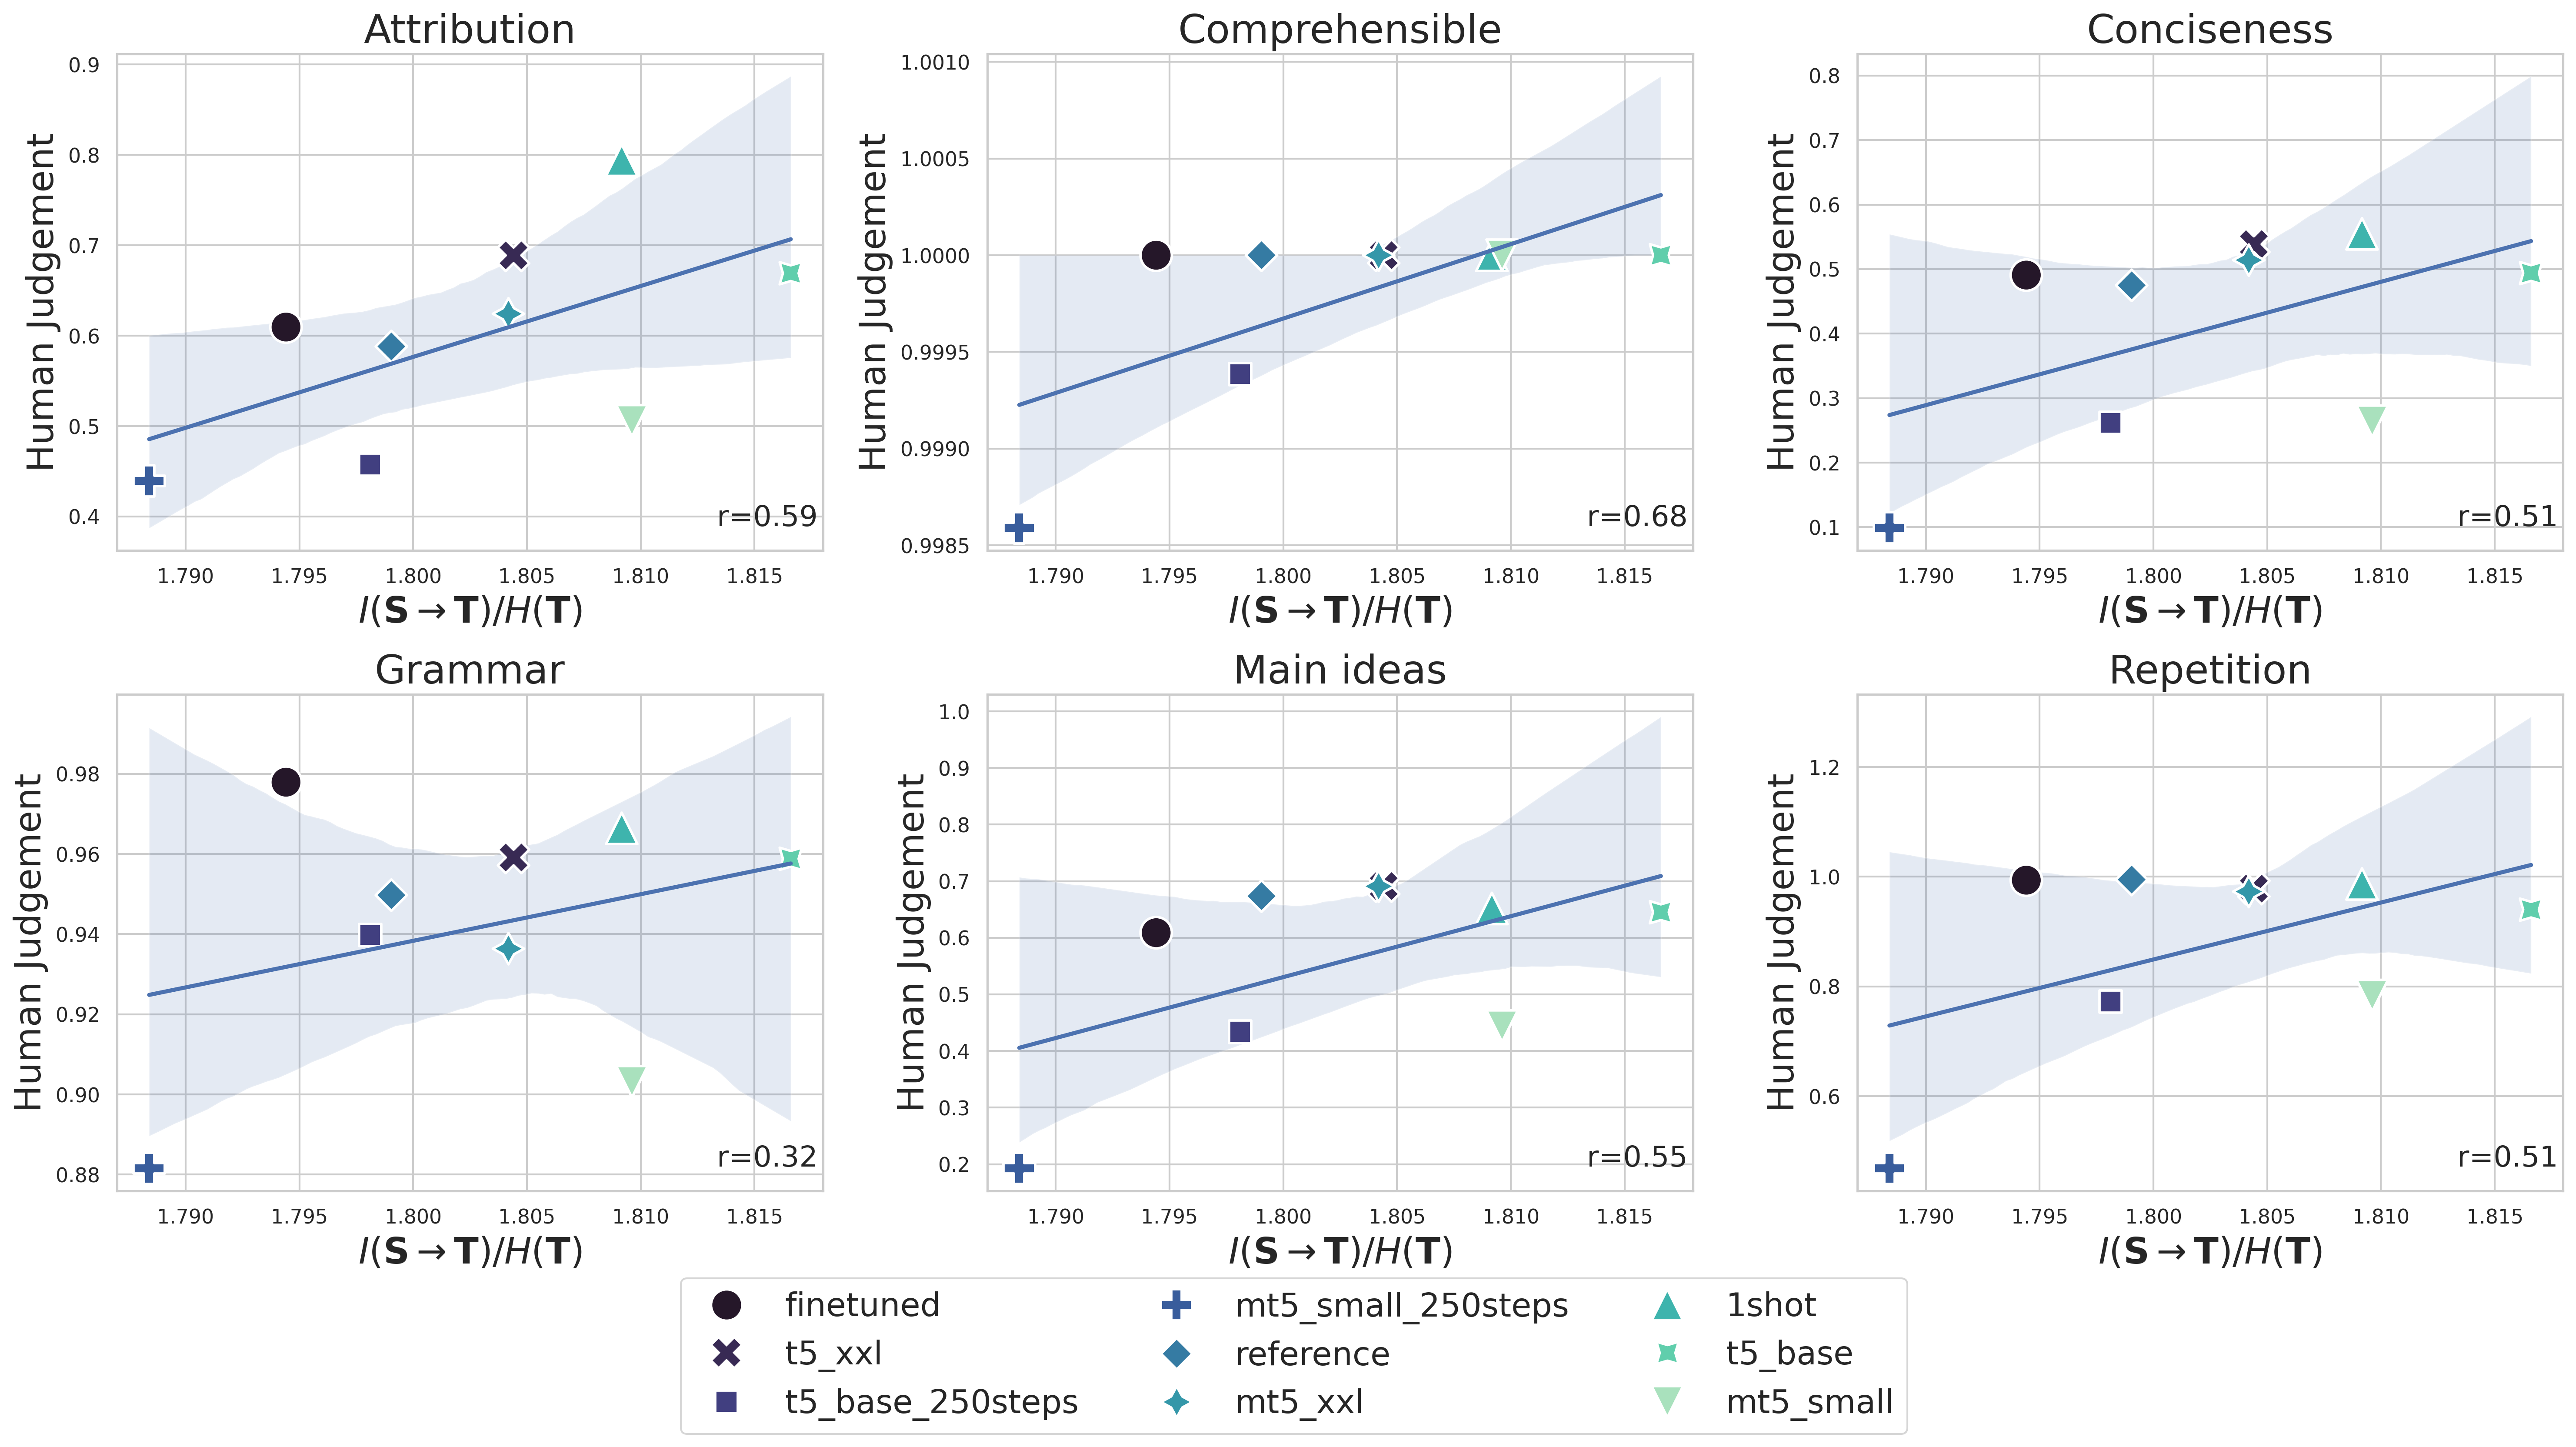

In [29]:

def custom_reg_plot(data, x=None, y=None, hue=None, **kwargs):
    ax = plt.gca()
    sns.regplot(data=data, x=x, y=y, ci=95, scatter=False, ax=ax, x_ci='sd')
    sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=100, ax=ax, **kwargs, palette='mako')
    return ax




fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=False, sharex=False, dpi=300)
# COL = "H(summary|text)"

axes = axes.flatten()
df['N-MI_1'] = df['I(text -> summary)'] / df['H(summary)']
df['I(summary -> text) / H(text)'] = df['I(summary -> text)'] / df['H(text)']
# info diff:
df["I(text -> summary) - I(summary -> text)"] = df['I(text -> summary)'] - df['I(summary -> text)']
df["I(summary -> text) - I(text -> summary)"] = df['I(summary -> text)'] - df['I(text -> summary)']
# COL =  "H(text)"

COL = "I(summary -> text) / H(text)"
for k, task in enumerate(tasks_names):
    print(task)
    sns.set_theme(style="whitegrid")

    # sns.regplot(data=df, x="I(summary -> text)", y=f"SH/{task}", ci=95, scatter=False, ax=axes[tasks_names.index(task)], x_ci='sd')*
    # with correlation coefficient
    sns.regplot(data=df, x=COL, y=f"SH/{task}", ci=95, scatter=False, ax=axes[tasks_names.index(task)], x_ci='sd')

    # annotate with the correlation coefficient:
    corr = df[COL].corr(df[f"SH/{task}"])
    axes[tasks_names.index(task)].annotate(f"r={corr:.2f}", xy=(0.85, 0.05), xycoords='axes fraction', fontsize=16)


    sns.scatterplot(data=df, x=COL, y=f"SH/{task}", style="metadata/Model name", hue="metadata/Model name", alpha=1, s=300, ax=axes[tasks_names.index(task)], palette='mako')
    axes[tasks_names.index(task)].set_title(task, fontsize=22)
    
    # rename x axis
    axes[tasks_names.index(task)].set_xlabel("$I(\\mathbf{S} \\rightarrow \\mathbf{T}) / H(\\mathbf{T})$", fontsize=20)
    # axes[tasks_names.index(task)].set_xlabel("$H(\\mathbf{T})$", fontsize=20)

    # renames x and y labels
    axes[tasks_names.index(task)].set_ylabel("Human Judgement", fontsize=20)

    # legend fontsize
    axes[tasks_names.index(task)].legend(fontsize=14)

    # remove legends
    if k != 1:
        axes[k].get_legend().remove()
        # put legend on bottom right

# put a single legend below the center of the whole figure

fig.legend(*axes[1].get_legend_handles_labels(), loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.5, -0.12))
axes[1].get_legend().remove()

fig.tight_layout()
path = f"../../../papers/Mutual-information-for-summarization/img/seahorse_ds/"
Path(path).mkdir(parents=True, exist_ok=True)

# fig.savefig("../../../papers/Mutual-information-for-summarization/img/seahorse_ds/correlation_with_human_judgement_htext.png", dpi=300, bbox_inches='tight')
fig.savefig("../../../papers/Mutual-information-for-summarization/img/seahorse_ds/correlation_with_human_judgement.png", dpi=300, bbox_inches='tight')

